<a href="https://colab.research.google.com/github/karaage0703/colab-notebooks/blob/main/transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transcription
Transcribe audio

Reference:
- https://zenn.dev/karaage0703/articles/ecfab2effb7c31
- https://zenn.dev/karaage0703/articles/d47bbb085fcb83
- https://zenn.dev/kurehajime/scraps/f78d6247c63aa3

## Mount Google Drive and select file

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Slect audio file and copy path

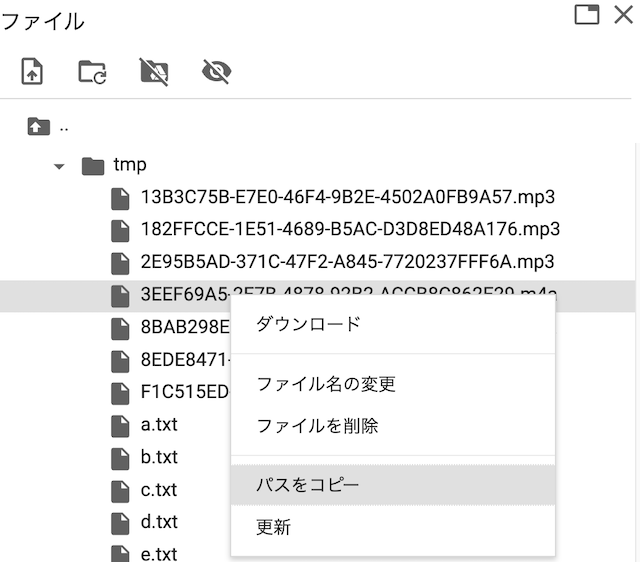

Paste file path

In [ ]:
audio_file_path = '/content/drive/MyDrive/sample.mp3'

## Transcribe with whisper

Install Whisper

In [ ]:
!pip install -qq git+https://github.com/openai/whisper.git

Transcribe

In [ ]:
MODEL_TYPE = 'large'
LANGUAGE_TYPE = 'ja'

import whisper
whisper_model = whisper.load_model(MODEL_TYPE)

result = whisper_model.transcribe(audio_file_path, verbose=True, language=LANGUAGE_TYPE)
print(result['text'])

Save text file

In [ ]:
save_file_name = 'transcription.txt'
transcription_text = result['text']

with open(save_file_name, 'w', encoding='utf_8') as f:
    f.write(transcription_text)

Download text file

In [ ]:
from google.colab import files
files.download(save_file_name)

## Fix text with ChatGPT

Open text file and confirm text file

In [ ]:
#open_file_name = save_file_name
open_file_name ='/content/drive/MyDrive/sample.txt'

with open(open_file_name, 'r', encoding='utf_8') as f:
    transcription_text = f.read()

transcription_text[0:100]

Install libraries

In [ ]:
!pip install -qq openai
!pip install -qq janome
!pip install -qq tqdm

Input open ai key

In [ ]:
OPEN_API_KEY = ''

Import libaries and confirm text token size

In [ ]:
import openai
import tiktoken
from tqdm import tqdm

openai.api_key = OPEN_API_KEY
#model_name = 'gpt-4'
model_name = 'gpt-3.5-turbo'

encoding = tiktoken.encoding_for_model(model_name)
count = len(encoding.encode(transcription_text))
print(count)

Split text and confirm token size

In [ ]:
from janome.tokenizer import Tokenizer

def split_text_into_chunks(text, max_tokens=500):
    tokenizer = Tokenizer()
    tokens = list(tokenizer.tokenize(text, wakati=True)) # wakati=True returns a list of words
    chunks = []

    for i in range(0, len(tokens), max_tokens):
        chunk = tokens[i:i+max_tokens]
        chunks.append(''.join(chunk))

    return chunks

chunks = split_text_into_chunks(transcription_text)

print(len(encoding.encode(chunks[0])))

Input prompt of ChatGPT

In [ ]:
order = """次の文章の誤記訂正、句読点の追加をしてください。極力元の文章は変更しないようにしてください。


"""

Fix text

In [ ]:
fix_text = ''

for chunk in tqdm(chunks):
    prompt = order + chunk
    print(prompt)

    response = openai.ChatCompletion.create(
        model=model_name,
        messages=[
            {"role": "user", "content": prompt},
        ],
    )

    print(response.choices[0]["message"]["content"].strip())
    fix_text += response.choices[0]["message"]["content"].strip()

Save text file

In [ ]:
save_fixed_file_name = 'transcription_fix.txt'

with open(save_fixed_file_name, 'w', encoding='utf_8') as f:
    f.write(fix_text)

Download text file

In [ ]:
from google.colab import files
files.download(save_fixed_file_name)